# Intro to Stats Learning

## Lab 10 - PCA and Clustering

> https://juliaai.github.io/DataScienceTutorials.jl/isl/lab-10/
> (project folder) https://raw.githubusercontent.com/juliaai/DataScienceTutorials.jl/gh-pages/__generated/ISL-lab-10.tar.gz

In [1]:
using Pkg; Pkg.activate("D:/JULIA/6_ML_with_Julia/ISL-lab-10"); Pkg.instantiate()

  Activating project at `D:\JULIA\6_ML_with_Julia\ISL-lab-10`


> Getting started <br>
> PCA pipeline<br>
> More interesting data...<br>
> 1. PCA pipeline
> 2. Clustering

### Getting started 
---


In [2]:
using MLJ
import RDatasets: dataset
import DataFrames: DataFrame, select, Not, describe
using Random

data = dataset("datasets", "USArrests")
names(data)

5-element Vector{String}:
 "State"
 "Murder"
 "Assault"
 "UrbanPop"
 "Rape"

Let's have a look at the mean and standard deviation of each feature:

In [3]:
describe(data, :mean, :std)

,variable,mean,std
,Symbol,Union…,Union…
1,State,,
2,Murder,7.788,4.35551
3,Assault,170.76,83.3377
4,UrbanPop,65.54,14.4748
5,Rape,21.232,9.36638


Let's extract the numerical component and coerce

In [4]:
X = select(data, Not(:State))
X = coerce(X, :UrbanPop => Continuous, :Assault => Continuous)

,Murder,Assault,UrbanPop,Rape
,Float64,Float64,Float64,Float64
1,13.2,236.0,58.0,21.2
2,10.0,263.0,48.0,44.5
3,8.1,294.0,80.0,31.0
4,8.8,190.0,50.0,19.5
5,9.0,276.0,91.0,40.6
6,7.9,204.0,78.0,38.7
7,3.3,110.0,77.0,11.1
8,5.9,238.0,72.0,15.8
9,15.4,335.0,80.0,31.9


In [5]:
schema(X)

┌──────────┬────────────┬─────────┐
│ names    │ scitypes   │ types   │
├──────────┼────────────┼─────────┤
│ Murder   │ Continuous │ Float64 │
│ Assault  │ Continuous │ Float64 │
│ UrbanPop │ Continuous │ Float64 │
│ Rape     │ Continuous │ Float64 │
└──────────┴────────────┴─────────┘


### PCA pipeline

---


PCA is usually best done after standardization but we won't do it here:

In [6]:
PCA = @load PCA pkg=MultivariateStats

pca_mdl = PCA(pratio = 1)
pca = machine(pca_mdl, X)
fit!(pca)

PCA
W = MLJ.transform(pca, X);

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jeffr\.julia\packages\MLJModels\tMgLW\src\loading.jl:168


import MLJMultivariateStatsInterface ✔


┌ Info: Training Machine{PCA,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464


W is the PCA'd data; here we've used default settings for PCA and it has recovered 2 components:

In [7]:
schema(W)

┌───────┬────────────┬─────────┐
│ names │ scitypes   │ types   │
├───────┼────────────┼─────────┤
│ x1    │ Continuous │ Float64 │
│ x2    │ Continuous │ Float64 │
│ x3    │ Continuous │ Float64 │
│ x4    │ Continuous │ Float64 │
└───────┴────────────┴─────────┘


In [8]:
schema(W).names

(:x1, :x2, :x3, :x4)

Let's inspect the fit:

In [9]:
r = report(pca)
cumsum(r.principalvars ./ r.tvar)

4-element Vector{Float64}:
 0.9655342205668823
 0.9933515571990573
 0.9991510921213993
 1.0

In the second line we look at the explained variance with 1 then 2 PCA features and it seems that with 2 we almost completely recover all of the variance.

### More interesting data...

---


Instead of just playing with toy data, let's load the orange juice data and extract only the columns corresponding to price data:

In [10]:
data = dataset("ISLR", "OJ")

first(data, 5)

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH
,Cat…,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,CH,237.0,1.0,1.75,1.99,0.0,0.0,0.0
2,CH,239.0,1.0,1.75,1.99,0.0,0.3,0.0
3,CH,245.0,1.0,1.86,2.09,0.17,0.0,0.0
4,MM,227.0,1.0,1.69,1.69,0.0,0.0,0.0
5,CH,228.0,7.0,1.69,1.69,0.0,0.0,0.0


In [11]:
feature_names=[:PriceCH, :PriceMM, :DiscCH, :DiscMM, :SalePriceMM, :SalePriceCH, :PriceDiff, :PctDiscMM, :PctDiscCH]

X =  select(data, feature_names);

### PCA pipeline

In [12]:
Random.seed!(1515)

SPCA = Pipeline(Standardizer(), PCA(pratio = 1-1e-4))

spca = machine(SPCA, X)
fit!(spca)
W = MLJ.transform(spca, X)
names(W)

┌ Info: Training Machine{UnsupervisedPipeline{NamedTuple{,…},…},…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Training Machine{Standardizer,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Training Machine{PCA,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464


6-element Vector{String}:
 "x1"
 "x2"
 "x3"
 "x4"
 "x5"
 "x6"

What kind of variance can we explain?

In [13]:
rpca = collect(values(report(spca).report_given_machine))[2]
cs = cumsum(rpca.principalvars ./ rpca.tvar)

6-element Vector{Float64}:
 0.41746967484847325
 0.7233074812209769
 0.9436456234171873
 0.9997505816044252
 0.9998956501446641
 1.0

Let's visualise this

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\jeffr\.julia\packages\PyCall\L0fLP\src\numpy.jl:67


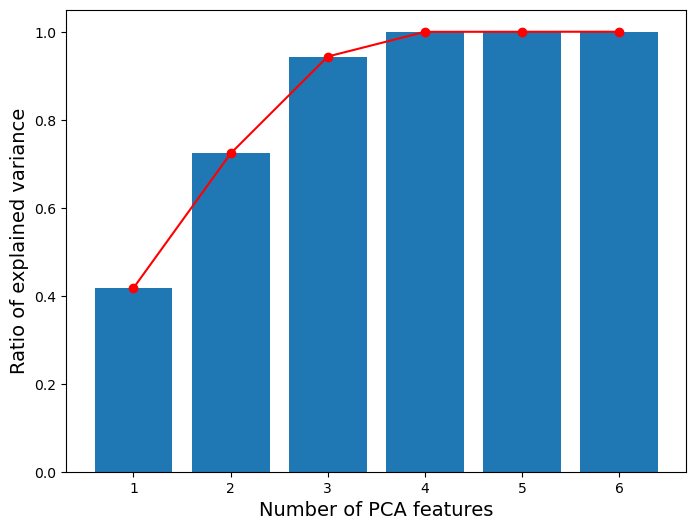

In [14]:
using PyPlot

figure(figsize = (8, 6))

PyPlot.bar(1:length(cs), cs)
plot(1:length(cs), cs, color = "red", marker= "o")

xlabel("Number of PCA features", fontsize = 14)
ylabel("Ratio of explained variance", fontsize = 14)

savefig("./plots/3.8.1.png")

So 4 PCA features are enough to recover most of the variance.

### Clustering

In [15]:
Random.seed!(1515)

KMeans = @load KMeans pkg=Clustering

SPCA2 = Pipeline(Standardizer(),
                 PCA(),
                 KMeans(k = 3))

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jeffr\.julia\packages\MLJModels\tMgLW\src\loading.jl:168


import MLJClusteringInterface ✔


UnsupervisedPipeline(
    standardizer = Standardizer(
            features = Symbol[],
            ignore = false,
            ordered_factor = false,
            count = false),
    pca = PCA(
            maxoutdim = 0,
            method = :auto,
            pratio = 0.99,
            mean = nothing),
    k_means = KMeans(
            k = 3,
            metric = Distances.SqEuclidean(0.0)),
    cache = true)

In [16]:
spca2 = machine(SPCA2, X)
fit!(spca2)

┌ Info: Training Machine{UnsupervisedPipeline{NamedTuple{,…},…},…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Training Machine{Standardizer,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Training Machine{PCA,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Training Machine{KMeans,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464


Machine{UnsupervisedPipeline{NamedTuple{,…},…},…} trained 1 time; caches data
  model: MLJBase.UnsupervisedPipeline{NamedTuple{(:standardizer, :pca, :k_means), Tuple{Unsupervised, Unsupervised, Unsupervised}}, MLJModelInterface.predict}
  args: 
    1:	Source @172 ⏎ `Table{AbstractVector{Continuous}}`


In [17]:
assignments = collect(values(report(spca2).report_given_machine))[3].assignments
mask1 = assignments .== 1
mask2 = assignments .== 2
mask3 = assignments .== 3;

Now we can try visualising this

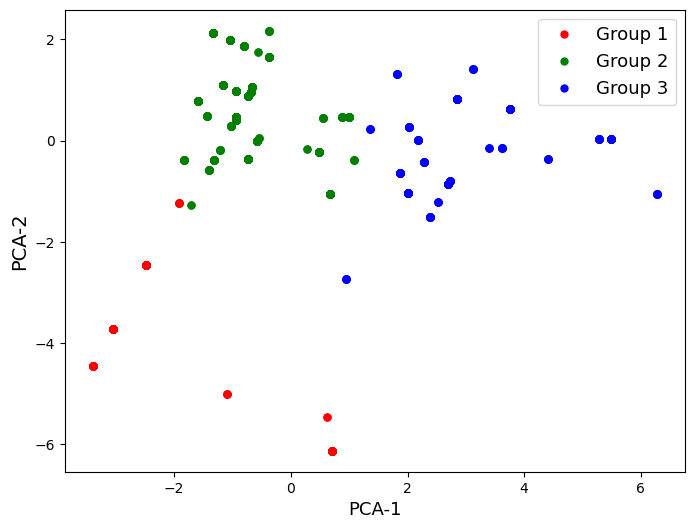

In [18]:
using PyPlot

figure(figsize = (8, 6))
for (m, c) in zip((mask1, mask2, mask3), ("red", "green", "blue"))
    plot(W[m, 1], W[m, 2], ls="none", marker=".", markersize = 10, color = c)
end 

xlabel("PCA-1", fontsize = 13)
ylabel("PCA-2", fontsize = 14)
legend(["Group 1", "Group 2", "Group 3"], fontsize = 13)

savefig("./plots/3.8.2.png")